<a href="https://colab.research.google.com/github/charan-datascientist/Census-Income/blob/master/FIT5215_Tut_07a_RNN_Fundamentals(Pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:#0b486b">  FIT3181/5215: Deep Learning (2024)</span>
***
*CE/Lecturer (Clayton):*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Lecturer (Clayton):* **Prof Dinh Phung** | dinh.phung@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Arghya Pal** | arghya.pal@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Lim Chern Hong** | lim.chernhong@monash.edu <br/>  <br/>
*Head Tutor 3181:*  **Miss Vy Vo** |  \[tran.vo@monash.edu \] <br/>
*Head Tutor 5215:*  **Dr Van Nguyen** |  \[van.nguyen1@monash.edu \]

<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">Tutorial 07a: Fundamentals of RNN in Pytorch</span> <span style="color:red">*****</span> #

This tutorial is designed to facilitate you in understanding the fundamental building blocks of a Recurrent Neural Network (RNN) including:
- The computational process of a standard and simple RNN cell.
- How to declare and manipulate with standard RNN, LSTM, and GRU cells.

We first import the necessary modules.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import torch
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## <span style="color:#0b486b">I. Fundamental of RNN</span> ##

### <span style="color:#0b486b">I.1. Manual RNN</span> ###

We now implement a simple basic RNN on our own. This basic RNN has two hidden states to take two inputs (i.e., the sequence length is $2$).

The computation process is as follows:
- $h_0 = tanh(X_0 \times U + b)$.
- $h_1 = tanh(X_1 \times U + h_0 \times W +b)$.

In the following code, $X0$ is a mini-batch with batch size $4$ consisting of  the data of time step $0$.
- $X0$'s shape is $[batch\_size \times input\_size]$

$X1$ is a mini-batch with batch size $4$ consisting of  the data of time step $1$.
- $X1$'s shape is $[batch\_size \times input\_size]$

In [2]:
import numpy as np

X0 = np.array([[0.0, 1.0, -2.0],
               [-3.0, 4.0, 5.0],
               [6.0, 7.0, -8.0],
               [6.0, -1.0, 2.0]], dtype= np.float32) # t = 0
X1 = np.array([[9.0, 8.0, 7.0],
               [0.0, 0.0, 0.0],
               [6.0, 5.0, 4.0],
               [1.0, 2.0, 3.0]], dtype= np.float32) # t = 1

In [4]:
X= np.stack((X0, X1), axis=0)
X = np.transpose(X, (1, 0, 2))
print(X.shape)
print(X)
# [batch_size, seq_len, hidden_size]

(4, 2, 3)
[[[ 0.  1. -2.]
  [ 9.  8.  7.]]

 [[-3.  4.  5.]
  [ 0.  0.  0.]]

 [[ 6.  7. -8.]
  [ 6.  5.  4.]]

 [[ 6. -1.  2.]
  [ 1.  2.  3.]]]


We now demonstrate the computational process for a standard RNN with sequence length $2$.

In [5]:
hidden_size = 5
input_size = 3

# Creating the parameters
U = torch.nn.Parameter(torch.randn(input_size, hidden_size, dtype=torch.float32))
W = torch.nn.Parameter(torch.randn(hidden_size, hidden_size, dtype=torch.float32))
b = torch.nn.Parameter(torch.zeros(1, hidden_size, dtype=torch.float32))

X0 = torch.tensor(X0)
X1 = torch.tensor(X1)
# Implementing the operations
h0 = torch.tanh(torch.matmul(X0, U) + b)
h1 = torch.tanh(torch.matmul(X1, U) + torch.matmul(h0, W) + b)

In [6]:
"""
Note:
If h0 is a tensor that has requires_grad=True, it means that it is part of the computation graph and PyTorch is tracking all operations
on it for gradient computation during backpropagation.
Converting such a tensor directly to a NumPy array with numpy() would raise an error, as NumPy does not support gradient computation.
By detaching the tensor using detach(), you create a new tensor that shares the same data but is not tracked in the computation graph.
"""
print("h0= {}".format(h0.detach().numpy()))

h0= [[-0.9964264   0.603314   -0.9993358   0.9564429   0.99720746]
 [-0.9492828   0.9999598   0.9422164  -0.84988445 -0.9997113 ]
 [-0.9999994  -0.9999953  -1.          1.          1.        ]
 [ 1.         -1.          0.99997056 -0.7210807  -0.99982643]]


In [ ]:
print("h1= {}".format(h1.detach().numpy()))

h1= [[ 1.         -0.99996954 -0.9999739  -1.          1.        ]
 [-0.54470336  0.93600446 -0.22835343  0.83006823 -0.81255907]
 [ 1.         -0.9935022  -0.9966816  -1.          0.99999994]
 [ 0.99999654  0.99787384 -0.99973714 -0.9999939  -0.9000264 ]]


In [7]:
h0.shape

torch.Size([4, 5])

In [ ]:
h = torch.stack([h0,h1], axis =0)
print(h.shape)
h = torch.transpose(h, 0, 1)
print(h.shape)
print(h)

torch.Size([2, 4, 5])
torch.Size([4, 2, 5])
tensor([[[-0.9846, -0.9911,  0.9085, -0.5241,  0.3290],
         [ 1.0000, -1.0000, -1.0000, -1.0000,  1.0000]],

        [[ 0.9923,  1.0000, -0.9995, -0.8480, -0.9999],
         [-0.5447,  0.9360, -0.2284,  0.8301, -0.8126]],

        [[-0.9986, -1.0000,  1.0000, -1.0000,  1.0000],
         [ 1.0000, -0.9935, -0.9967, -1.0000,  1.0000]],

        [[ 1.0000, -0.9928, -0.9245, -0.9976,  1.0000],
         [ 1.0000,  0.9979, -0.9997, -1.0000, -0.9000]]],
       grad_fn=<TransposeBackward0>)


**<span style="color:red">Exercise 1</span>:** Explain why $h_0$  and  $h_1$  have the above shapes.

**<span style="color:red">Exercise 2</span>:** Extend to a given $L$ time steps

### <span style="color:#0b486b">I.2. Recurrent cells in Pytorch</span> ###

Pytorch supports most of the necessary recurrent cells (layers) which you might need in your real projects. The following figure shows all recurrent cells (layers) supported by Pytorch.

- RNN (Simple RNN): torch.nn.RNN
- LSTM (Long Short-Term Memory): torch.nn.LSTM
- GRU (Gated Recurrent Unit): torch.nn.GRU

#### <span style="color:#0b486b">Simple RNN cell</span> ####

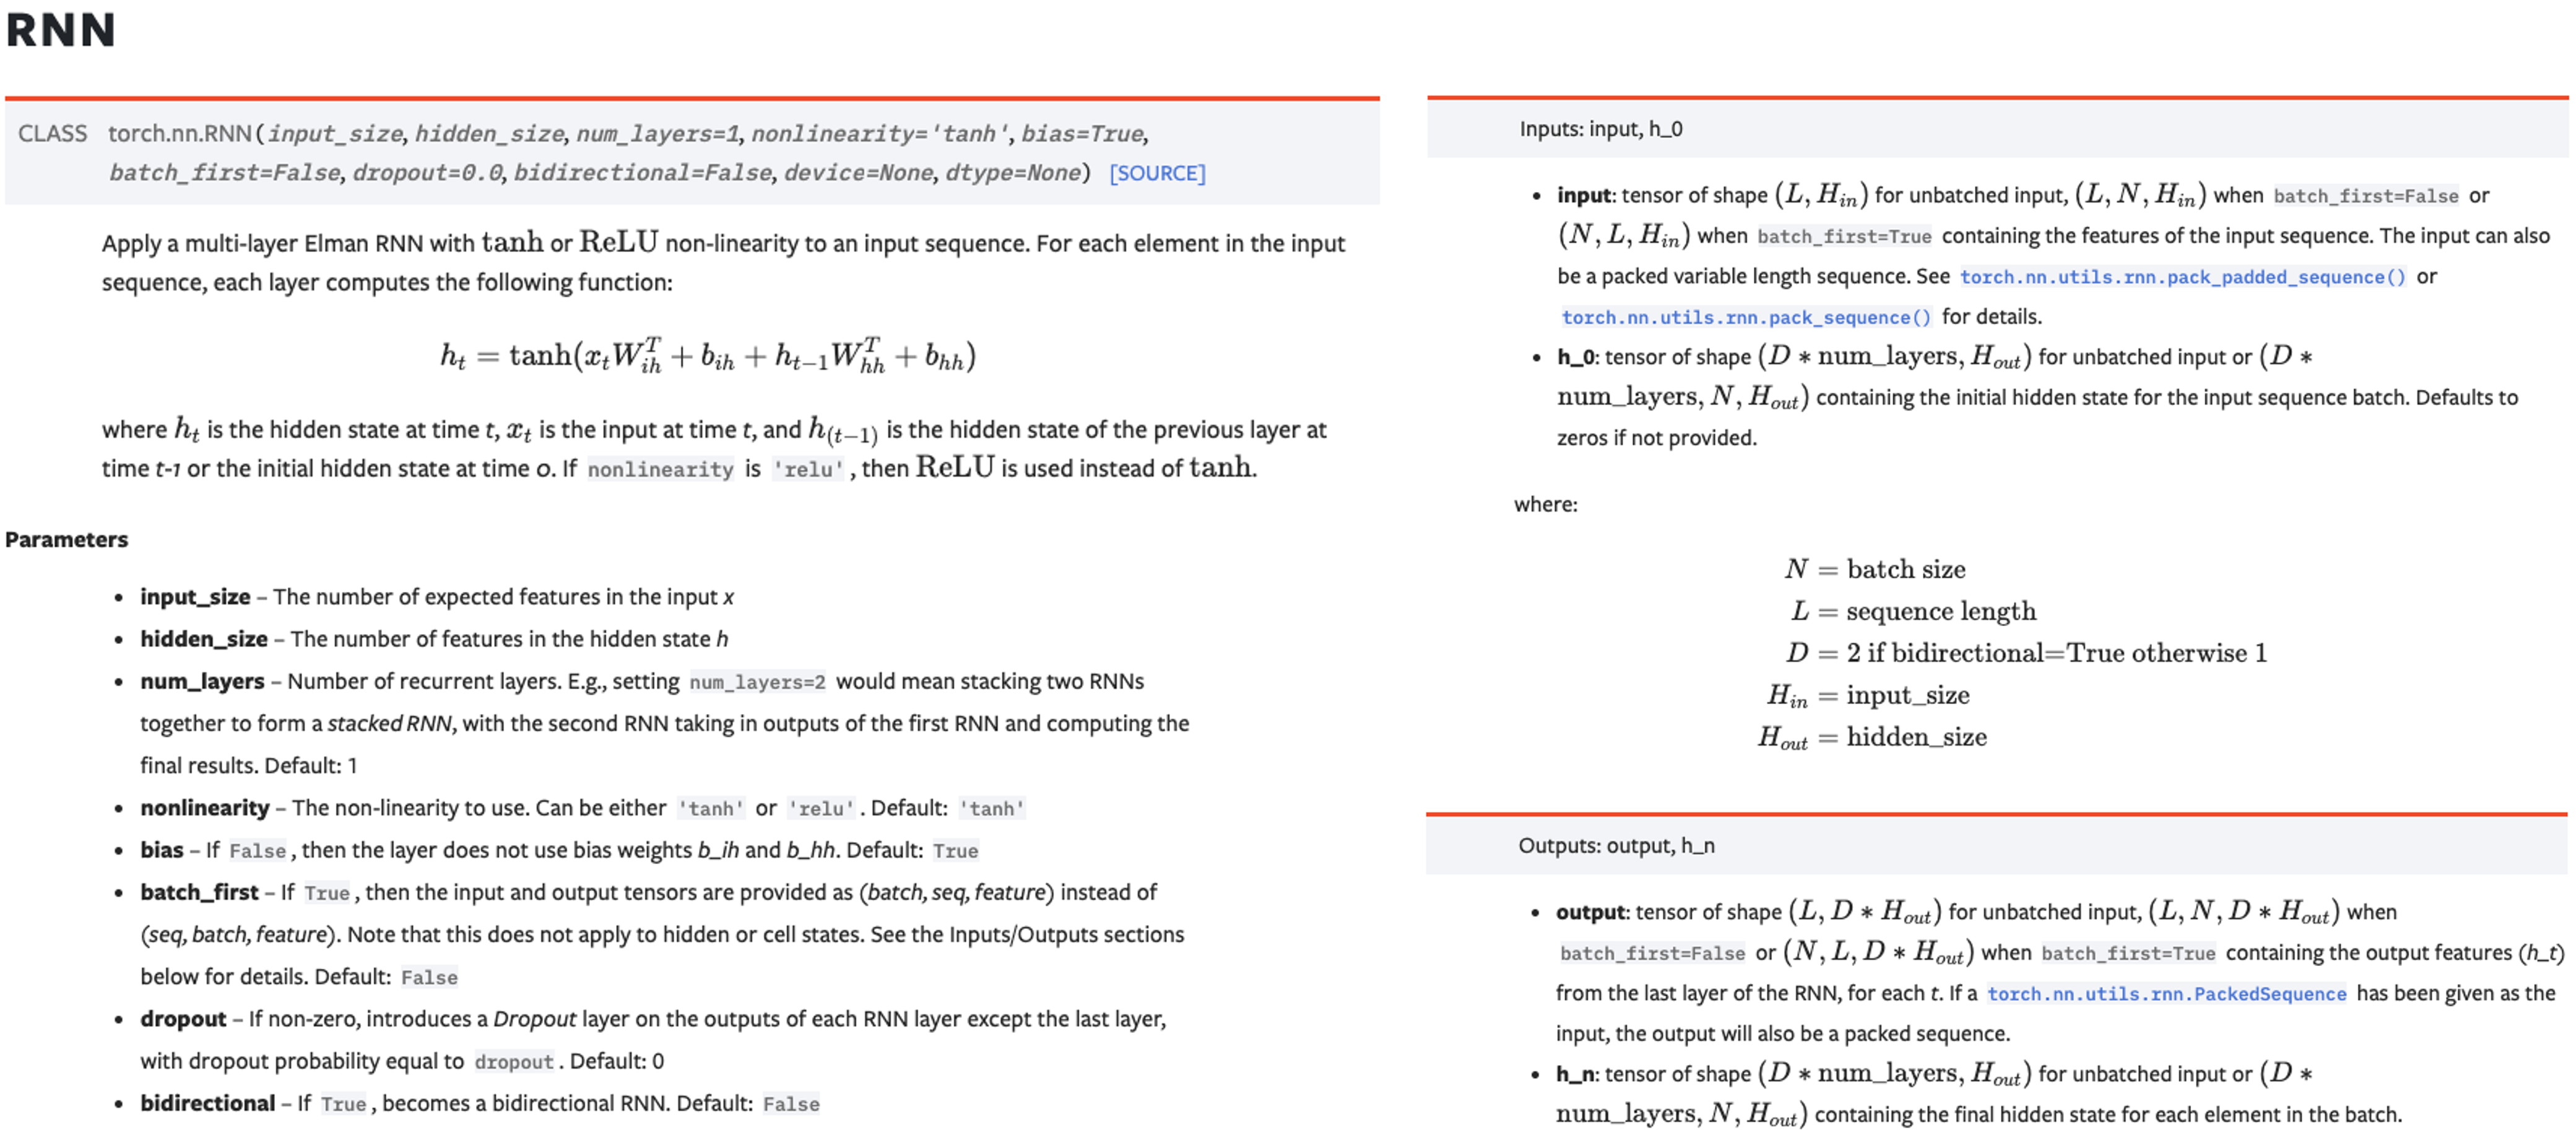

There are some important things you need to be clear about.

First, you can imagine that your RNN consists of many recurrent layers, each of which consists of many cells (e.g., simple RNN cell, LSTM cell, and GRU cell). You need to input to a recurrent layer a 3D tensor with the shape $batch\_size \times timesteps \times input\_size$ and take the output as a 3D tensor with the shape $batch\_size \times timesteps \times output\_size$.
- $batch\_size$ means the number of sequences (sentences) in a mini-batch, $timesteps$ means the sequence length or number of tokens/words in your sequences, and $input\_size$ specifies the input size of each token. Later you will know that for symbolic tokens like words, we need to embed them to feature vectors using an embedding matrix.

The *outputs* returned by a recurrent cell/layer is:
- The hidden values for all hidden cells ($[h_1, h_2,...,h_L]$).
- The last hidden value (i.e., the value of the last hidden cell or $h_L$).

Note that regarding the terminologies, there are some equivalent terms that you need to pay attention to:
- `timesteps = seq_length` or sequence length which specifies the number of cells in a recurrent layer.
- `state_size = hidden_size` which represents the common size of cells in a given recurrent layer, meaning the common size of $h_1, h_2,...,h_L$ where $L$ is the sequence length.

Additional reading:
- The hidden state is a vector that captures the internal memory of the RNN. It's used to pass information from one time step to the next, allowing the RNN to learn dependencies and patterns in sequential data.
- h0 is the initial value of the hidden state, which is used as the starting point for the RNN's internal memory. It's typically set to a tensor of zeros, with a shape that matches the number of hidden units in the RNN.
- h0 is important because it can affect the RNN's behavior and performance. A well-chosen h0 can help the RNN learn faster and more accurately, while a poorly chosen h0 can lead to slow convergence or poor performance.

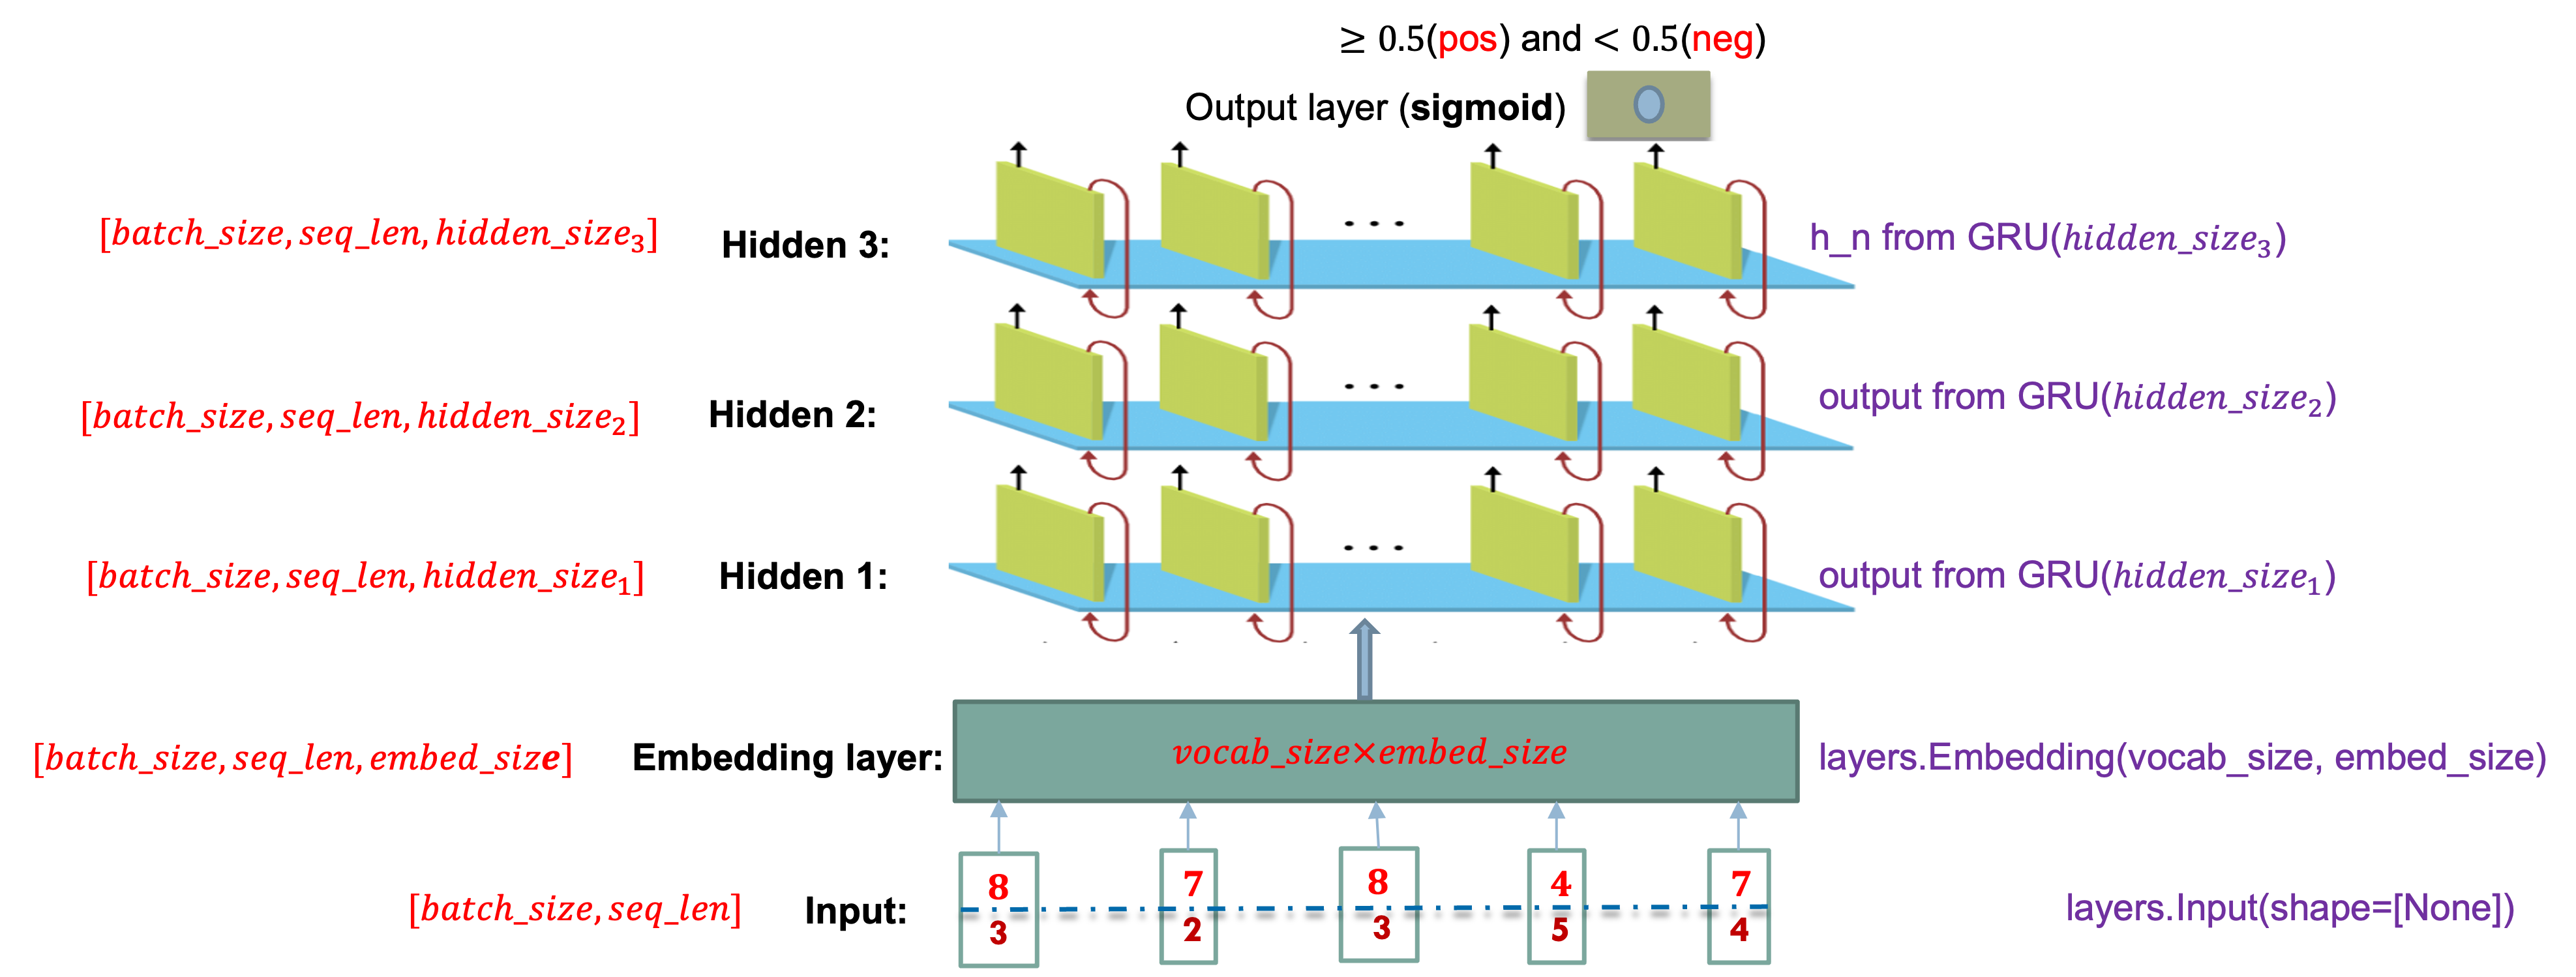

The picture above shows the illustration of RNN architecture. Basically, we have three recurrent layers (e.g., *Hidden 1, Hidden 2, and Hidden 3*). Each recurrent layer consists of many GRU cells.
- Input to Hidden 1 layer is 3D tensor $batch\_size \times seq\_len \times embed\_size$ and output is the 3D tensor $batch\_size \times seq\_len \times state\_size_1$. Here $state\_size_1$ is the common hidden state size of all GRU cells on the Hidden 1 layer.
- Input to Hidden 2 layer is 3D tensor $batch\_size \times seq\_len \times state\_size_1$ and output is the 3D tensor $batch\_size \times seq\_len \times state\_size_2$. Here $state\_size_2$ is the common hidden state size of all GRU cells on the Hidden 2 layer.
- Input to Hidden 3 layer is 3D tensor $batch\_size \times seq\_len \times state\_size_2$ and output is the 3D tensor $batch\_size \times seq\_len \times state\_size_3$. Here $state\_size_3$ is the common hidden state size of all GRU cells on the Hidden 3 layer.

Regarding how to transform a batch of sentences to sequences of indices as a 2D tensor $batch\_size \times seq\_len$ and then use the embedding layer to further transform to a 3D tensor with the shape $batch\_size \times seq\_len \times embed\_size$, please refer to Tute 8b.

The following code returns $output$ and $h\_n$ as the hidden values for all hidden cells and the last hidden value with the shape:

($32 \times 10 \times 20$) and ($1 \times 32 \times 20$), respectively.

In these values, $32$ is batch_size, $10$ is the sequence length, and $20$ is the hidden state size.

In [ ]:
# Using default initialization for h0 from PyTorch
inputs = np.random.random([32, 10, 8]).astype(np.float32)
inputs = torch.tensor(inputs)

simple_rnn = torch.nn.RNN(input_size=8, hidden_size=20, num_layers=1, batch_first=True)

output, h_n = simple_rnn(inputs)  # The output has shape `[32, 10, 20]` and the h_n has shape `[1, 32, 20]`.

In [ ]:
print(output.shape)
print(h_n.shape)

torch.Size([32, 10, 20])
torch.Size([1, 32, 20])


In [ ]:
# Manually initialize h0
inputs = np.random.random([32, 10, 8]).astype(np.float32)
inputs = torch.tensor(inputs)

simple_rnn = torch.nn.RNN(input_size=8, hidden_size=20, num_layers=1, batch_first=True)
h0 = torch.randn(1, 32, 20)

output, h_n = simple_rnn(inputs, h0)  # The output has shape `[32, 10, 20]` and the h_n has shape `[1, 32, 20]`.

In [ ]:
print(output.shape)
print(h_n.shape)

torch.Size([32, 10, 20])
torch.Size([1, 32, 20])


**<span style="color:red">Exercise 3</span>:** Explain the shape of the output and h_n variables.

#### <span style="color:#0b486b">LSTM cell</span> ####

LSTM cell/layer is encapsulated in *torch.nn.LSTM*. The signature and parameters of the LSTM class are almost similar to those of the standard RNN cell class.

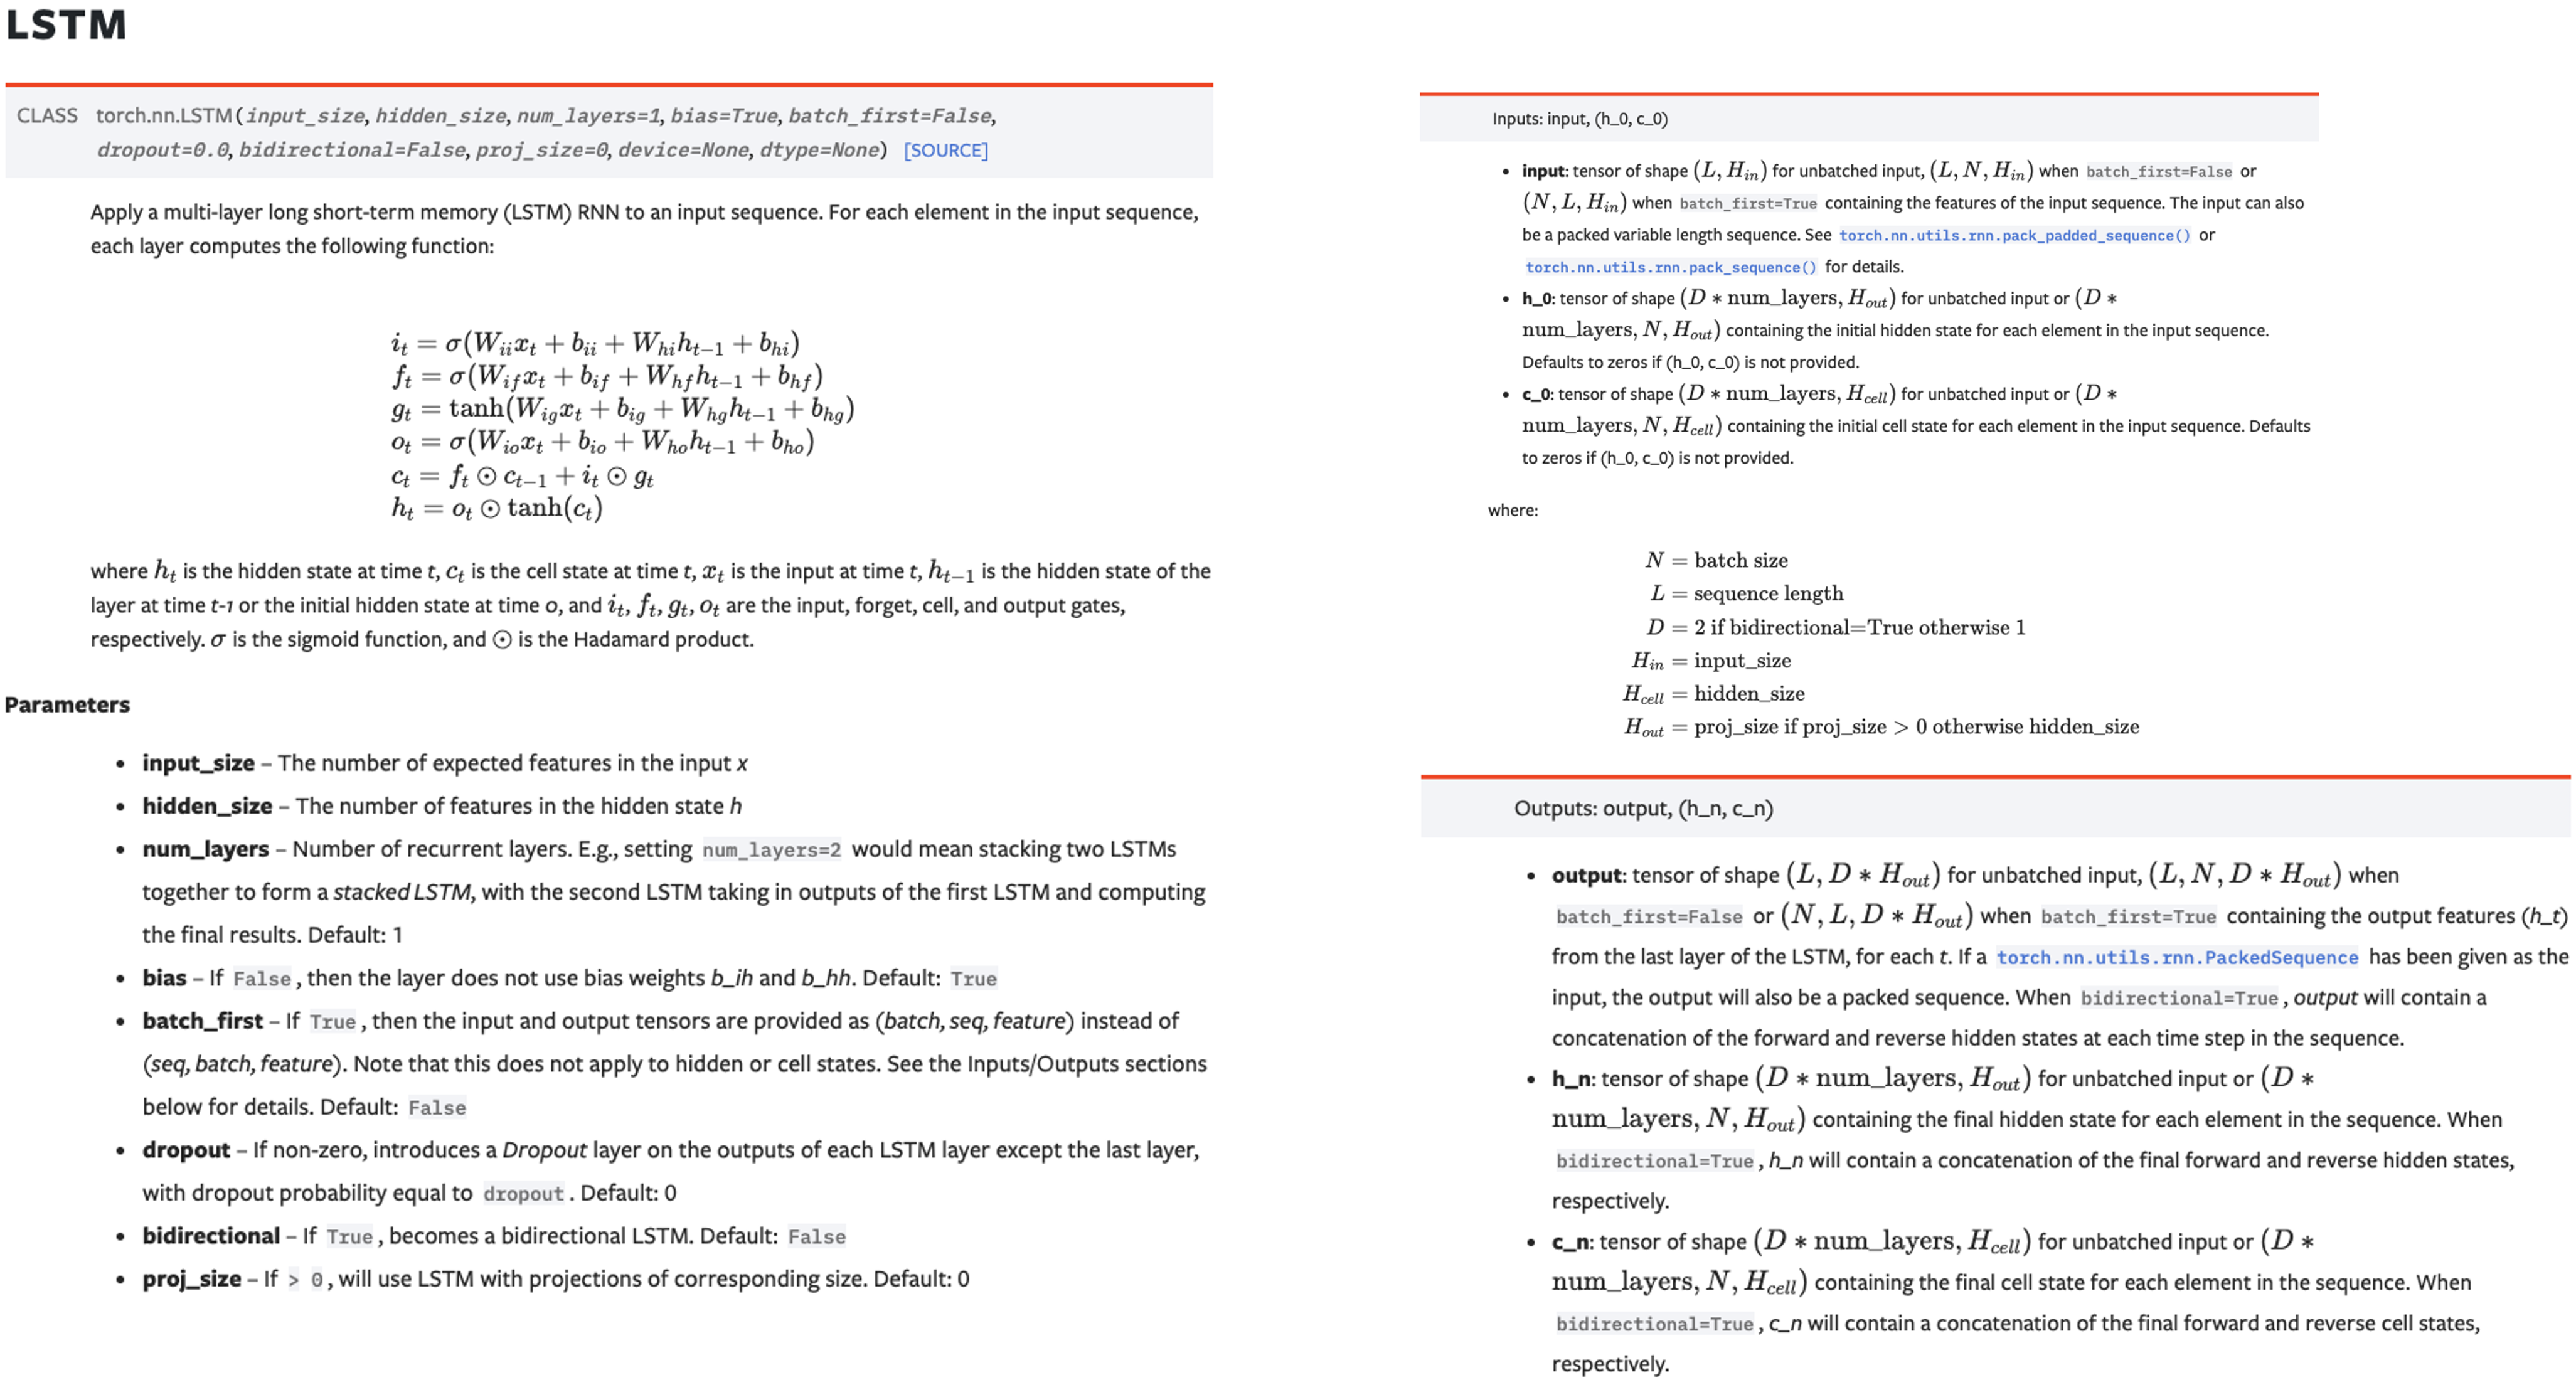

In [ ]:
# Using default initialization for h0 and c0 from PyTorch
inputs = torch.randn([32, 10, 8])

lstm = torch.nn.LSTM(input_size=8, hidden_size=20, num_layers=1, batch_first=True)

output, (h_n, c_n) = lstm(inputs)

In [ ]:
print(output.shape)
print(h_n.shape)
print(c_n.shape)

torch.Size([32, 10, 20])
torch.Size([1, 32, 20])
torch.Size([1, 32, 20])


In [ ]:
# Manually initialize h0 and c0
inputs = torch.randn([32, 10, 8])

lstm = torch.nn.LSTM(input_size=8, hidden_size=20, num_layers=1, batch_first=True)
h0 = torch.randn(1, 32, 20)
c0 = torch.randn(1, 32, 20)

output, (h_n, c_n) = lstm(inputs, (h0, c0))

In [ ]:
print(output.shape)
print(h_n.shape)
print(c_n.shape)

torch.Size([32, 10, 20])
torch.Size([1, 32, 20])
torch.Size([1, 32, 20])


#### <span style="color:#0b486b">GRU cell</span> ####

GRU cell/layer is packaged in *the class torch.nn.GRU*. The signature and paramters of the GRU class are similar to that of the standard RNN cell class.

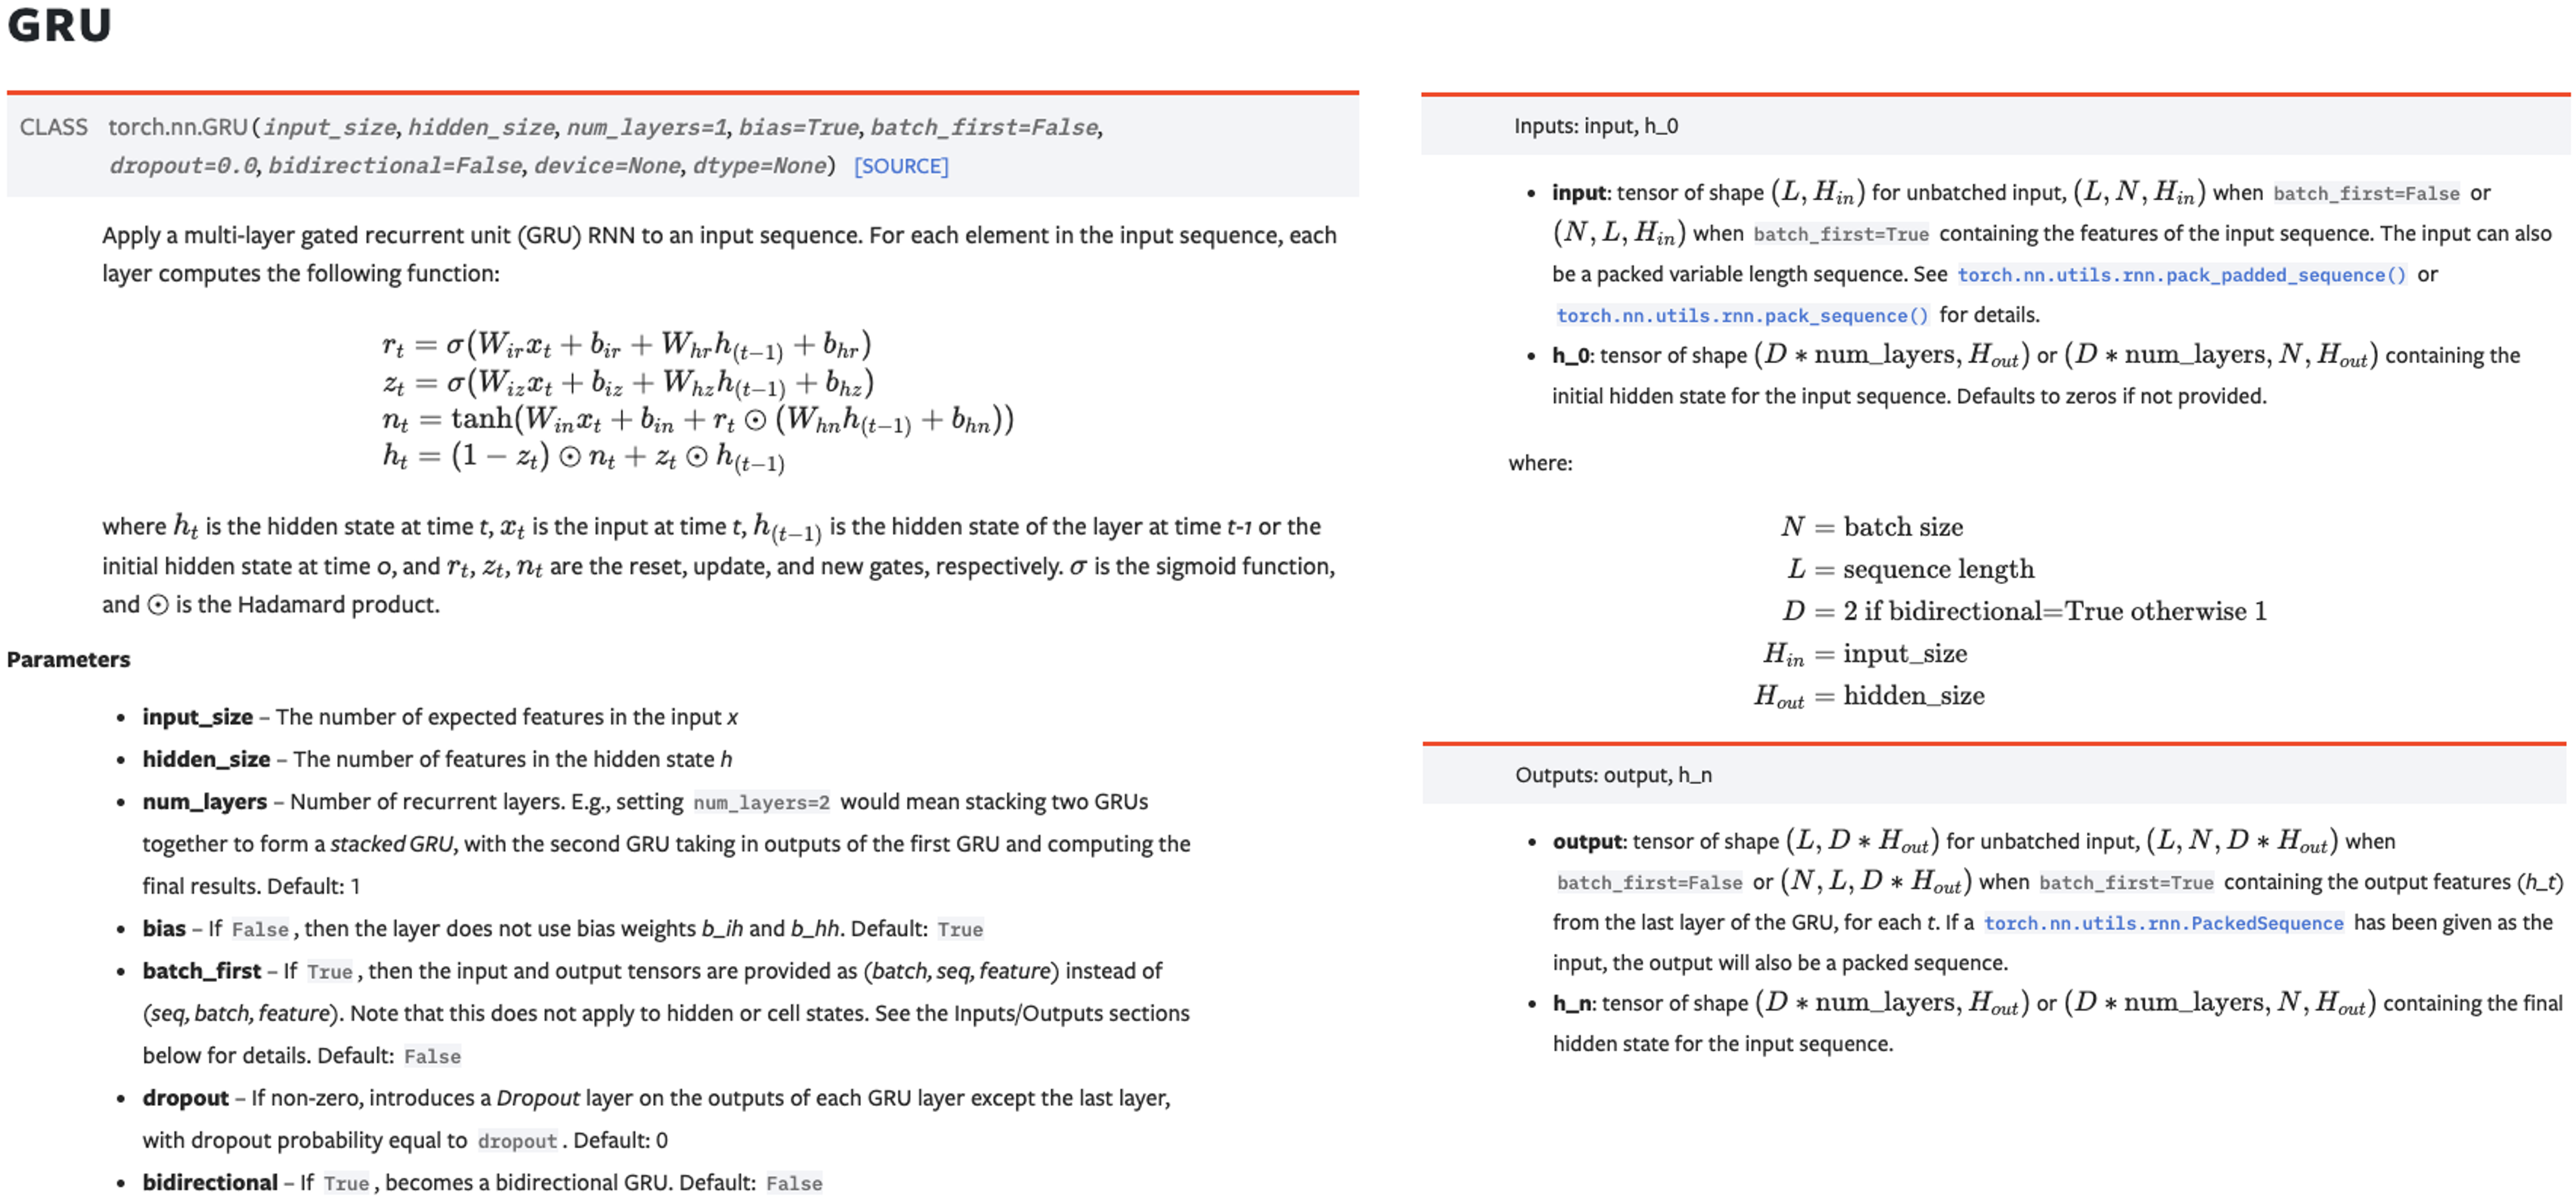

In [ ]:
# Using default initialization for h0 from PyTorch
inputs = torch.randn([32, 10, 8])

gru = torch.nn.GRU(input_size=8, hidden_size=20, num_layers=1, batch_first=True)

output, h_n = gru(inputs)

In [ ]:
print(output.shape)
print(h_n.shape)

torch.Size([32, 10, 20])
torch.Size([1, 32, 20])


In [ ]:
# Manually initialize h0
inputs = torch.randn([32, 10, 8])

gru = torch.nn.GRU(input_size=8, hidden_size=20, num_layers=1, batch_first=True)
h0 = torch.randn(1, 32, 20)

output, h_n = gru(inputs, h0)

In [ ]:
print(output.shape)
print(h_n.shape)

torch.Size([32, 10, 20])
torch.Size([1, 32, 20])


---
### <span style="color:#0b486b"> <div  style="text-align:center">**THE END**</div> </span>